# CMSE 802 Pre-class assignment: Artificial Neutral Networks (ANN) Part 2
## Date: 11/09/2018
## Due: 11/12/2018; 10:30PM

### The goal of this assignment is to learn more about ANN.

---
### Your name: Boyao Zhu

### Gradient Descent

**Watch the following video (This should look familar):**

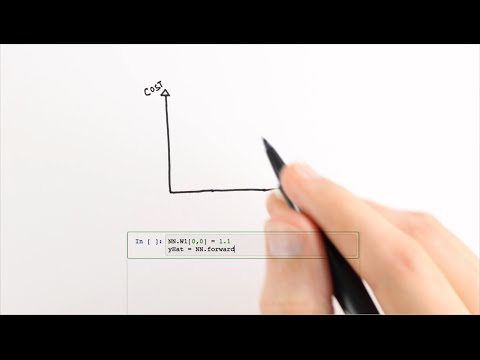

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5u0jaA3qAGk',width=640,height=360)

**Question 1**: In simple terms, explain the "Curse of Dimentionality"?

**Your answer: ** A lot of data, or samples and features are a lot

---

### 2. Back Propagation:

Please watch the following video

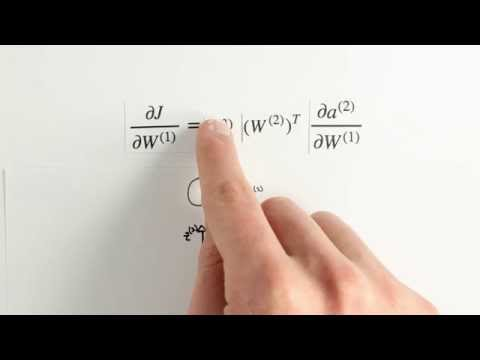

In [2]:
YouTubeVideo('GlcnxUlrtek',width=640,height=360)

**Question 2**: The gradient decent algorithm in Neural Networks is often called  "back Propagation."  What is being passed back though the algorithm and causing the weights to be updated?

**Your answer: ** gradient

### The code in the cell below is intuitively implemented as in the videos so far. Complete the missing part in the backward propagation function. 

In [15]:
import numpy as np


# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)


# Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

## ~~~~~~~~~~~~~~~~~~~~~~~~~above this line is input data~~~~~~~~~~~~~~~~~~~~

class My_Neural_Network(object):
    def __init__(self):
    #parameters
        self.inputSize = 2
        self.outputSize = 1
        self.hiddenSize = 3

        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

    def My_forward(self, X):
        #forward propagation through our network
        self.z2 = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.a2 = self.My_sigmoid(self.z2) # activation function
        self.z3 = np.dot(self.a2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        yHat = self.My_sigmoid(self.z3) # final activation function
        return yHat 

    def My_sigmoid(self, s):
        # activation function 
        return 1/(1+np.exp(-s))

## ~~~~~~~~~~~~~~~~~~~~~~~~~~above this line is forward calculation~~~~~~~~~~~~     
    
    def My_sigmoidPrime(self, s):
        #derivative of sigmoid
        return np.exp(-s)/(1 + np.exp(-s))**2

    def My_backward(self, X, y, yHat):
        # backward propgate through the network
        delta3 = np.multiply(-(y - yHat), self.My_sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.My_sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)

        # adjusting first set (input --> hidden) weights
        eta = 0.2
        self.W1 += -eta * dJdW1 # <== fill the blank
        
        # adjusting second set (hidden --> output) weights
        self.W2 += -eta * dJdW2 # <== fill the blank
        
## ~~~~~~~~~~~~~~~~~~~~~~~~~above this line is backward propagation~~~~~~~~~~~~        

    def My_trainer(self, X, y):
        yHat = self.My_forward(X)
        self.My_backward(X, y, yHat)

## ~~~~~~~~~~~~~~~~~~~~~~~~~above this line is training~~~~~~~~~~~~~~~~~~~~~~~~


**Let's try this neutral network.**

In [21]:
MNN = My_Neural_Network()

LSi = []
for i in range(10000): # trains MNN 10,000 times    
    MNN.My_trainer(X, y)   
    
    LSi.append(np.mean(np.square(y - MNN.My_forward(X))))
    
    
print("Input: \n" + str(X) ) 
print("Actual Output: \n" + str(y) ) 
print("Predicted Output: \n" + str(MNN.My_forward(X)) ) 
print("MSE: \n" + str(LSi[-1]) )   # mean sum squared loss
print("\n")


Input: 
[[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]
Actual Output: 
[[0.75]
 [0.82]
 [0.93]]
Predicted Output: 
[[0.74911767]
 [0.83725784]
 [0.90797188]]
MSE: 
0.0002612831535734953




**Using My_Neural_Network, what is predicted grade of a student who slept 8 hours and studied 5 hours before the exam? **

In [24]:
# Your code:
print (MNN.W1)
print (MNN.W2)
x = [8.0,5.0]
z1 = np.dot(x,MNN.W1)
a1 = MNN.My_sigmoid(z1)
z2 = np.dot(a1,MNN.W2)
a2 = MNN.My_sigmoid(z2)
print (a2)

[[-1.20211464  1.02859407  1.84469126]
 [ 0.45713647  0.42511434 -0.47254419]]
[[-1.75347317]
 [ 1.53602944]
 [ 1.87455916]]
[0.96799654]


---
### Below, we will use the code written by the author in the video. 

** Download and inspect the partSix.py file and run the following command: **

Here is a link to the entire code:
https://raw.githubusercontent.com/stephencwelch/Neural-Networks-Demystified/master/partSix.py

In [25]:
from partSix import *
print(X)
print(y)

[[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]
[[0.75]
 [0.82]
 [0.93]]


** Create an instance of the Neural Network and apply forward function to estimate $\hat{y}$: **

In [30]:
# Your code:
ANN = Neural_Network()

z1 = np.dot(X,ANN.W1)

a1 = ANN.sigmoid(z1)
z2 = np.dot(a1,ANN.W2)
yhat = ANN.sigmoid(z2)
print(yhat)

[[0.53217106]
 [0.65687231]
 [0.75299038]]


**Question 3**: How good is this initial estimation?

**Your answer: ** Not that good

---

## 3. Training:

Please watch the following video.

In [ ]:
YouTubeVideo('9KM9Td6RVgQ',width=640,height=360)

If you are interested in Part 5 of the video series (which is not required in this assignment), here is the link: https://www.youtube.com/watch?v=pHMzNW8Agq4

**Create an instance of the ```trainer``` class from the partSix.py file. Call the objects ```train``` function by passing it the original ```X``` and ```y``` data: **

In [34]:
# Your code:
tr = trainer(ANN)
tr.train(X,y)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 35
         Gradient evaluations: 35


** If done correctly, the ```NN``` object should now be trained. Apply the forward function again to see the new estimation of $\hat{y}$. **

In [36]:
# Your code:
z1 = np.dot(X,ANN.W1)
a1 = ANN.sigmoid(z1)
z2 = np.dot(a1,ANN.W2)
a2 = ANN.sigmoid(z2)
print (a2)

[[0.75001691]
 [0.82000255]
 [0.92987587]]


**Question 4**: Hopefully this worked and the estimation is better than the previous one.  How close are these values to the original grades before training?  What shortcomings are there to testing using this approach?

**Your answer: ** much closer to the order of 3.  I have no idea of the shortcomings of this approach, it is probably due to the sigmoid


---
Many of the materials in the Artificial Neural Networks module is from Neural Networks Demystified by @stephencwelch.  We have streamlined the content to better fit the format of the class. However, if you have questions or are just curious I highly recommend downloading everything from the following git repository.  It is a great reference to have:

    git clone https://github.com/stephencwelch/Neural-Networks-Demystified


---
### Congratulations, you're done with the pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20181112, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!